<a href="https://colab.research.google.com/github/john-s-butler-dit/CaseStudy_PredatorPrey/blob/master/05_Logistic%20Growth%20with%20Seasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Population with seasonal birth pattern Differential Equations

In this notebook we will numerically simulate a non-linear population growth with an oscilation due to seasonal birth [1]

In [ ]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt

## Logistic Population Equation
The logistic growth differential equation is a non-linear first order differential equation
\begin{equation}
\frac{d p}{dt}=\alpha_{Birth} p-\alpha_{Death} p^2+p\sin(2\pi t)
\end{equation}
for $a\leq t \leq b$ years, where $\alpha_{Birth}$ is the birth rate and $\alpha_{Death}$ is the death rate, with the initial condition
$$ p(a)=A. $$
The term 
$$p\sin(2\pi t)$$ modules a year oscilation due to seasonal birth.

As the equation is non-linear we must numerically approximate the solution.
In this simulation we set the parameters of the different equations:
*  as $\alpha_{Birth}=0.3$ and $\alpha_{Death}=0.01$, with the inital condition $p(0)=3$, over the time period $0\leq t \leq 10$.

In [ ]:
alpha_Birth=0.3
alpha_Death=0.01

## Discrete Domain 
To numerically approximate the solution we discretise the continuous domain using a step size, $h=1$, 
which gives
\begin{equation}
t_i=0+i h,
\end{equation}
for $i=0,...10$.
The figure below illustrate the discrete domain.

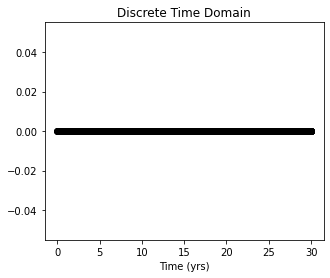

In [ ]:
h=0.01
t_end=30
t=np.arange(0,t_end+h/2,h)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

In [ ]:
N=int(t_end/h) # Number of Steps
P=np.zeros(N+1) # Numerical Solution P
P[0]=3


We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
\frac{P_{i+1}-P_i}{h}=\alpha_{Birth}P_i-\alpha_{Death}P_i^2+P_i\sin(2\pi t_i)
\end{equation}
re-arranging
\begin{equation}
\color{red}{P_{i+1}}=P_i+h\big(\alpha_{Birth}P_i-\alpha_{Death}P_i^2+P_i\sin(2\pi t_i)\big)
\end{equation}
where $h$ is the stepsize and where $P_i$ is the numerical approximation of $p(t_i)$ at time $t_i$, for $i=0,...,10$


In [ ]:
for i in range (0,N):
    P[i+1]=P[i]+h*(alpha_Birth*P[i]-
                           alpha_Death*P[i]*P[i]+P[i]*np.sin(2*np.math.pi*t[i]))

## Results
The plot bellow shows the Numerical solution $P_i$ of the Logistic Population with oscilation as a function of time $t$.

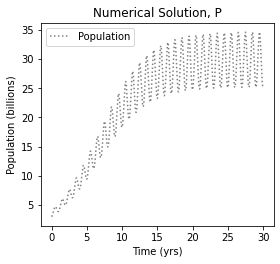

In [ ]:
## Plotting Figure
fig = plt.figure(1,figsize=(4,4))

ax = fig.add_subplot(1,1,1)

ax.plot(t,P,':',color='grey',label='Population')

ax.legend()

ax.set_xlabel('Time (yrs)')
ax.set_ylabel('Population (billions)')
ax.set_title('Numerical Solution, P')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html